In [1]:
import time
import cv2
import numpy as np

background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350


def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)


def segment_hand(frame, threshold=25):
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)

    # Grab the external contours for the image
    image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        return None
    else:
        
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        return (thresholded, hand_segment_max_cont)


cam = cv2.VideoCapture(0)

num_frames=0
element ='M'
num_imgs_taken =0

while True:
    ret, frame = cam.read()

    # filpping the frame to prevent inverted image of captured frame...
    frame = cv2.flip(frame, 1)

    frame_copy = frame.copy()

    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)

    if num_frames < 60:
        cal_accum_avg(gray_frame, accumulated_weight)
        if num_frames <= 59:
            
            cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT", (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
            #cv2.imshow("Sign Detection",frame_copy)
         
    #Time to configure the hand specifically into the ROI...
    elif num_frames <= 300: 

        hand = segment_hand(gray_frame)
        
        cv2.putText(frame_copy, "Adjust hand...Gesture for" + str(element), (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        
        # Checking if hand is actually detected by counting number of contours detected...
        if hand is not None:
            
            thresholded, hand_segment = hand

            # Draw contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.putText(frame_copy, str(num_frames)+"For" + str(element), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

            # Also display the thresholded image
            cv2.imshow("Thresholded Hand Image", thresholded)
    
    else: 
        
        # Segmenting the hand region...
        hand = segment_hand(gray_frame)
        
        # Checking if we are able to detect the hand...
        if hand is not None:
            
            # unpack the thresholded img and the max_contour...
            thresholded, hand_segment = hand

            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.putText(frame_copy, str(num_frames), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            #cv2.putText(frame_copy, str(num_frames)+"For" + str(element), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            cv2.putText(frame_copy, str(num_imgs_taken) + 'images' +"For" + str(element), (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
            # Displaying the thresholded image
            cv2.imshow("Thresholded Hand Image", thresholded)
            if num_imgs_taken <= 300:
                #cv2.imwrite(r"D:\\gesture\\train\\"+str(element)+"\\" + str(num_imgs_taken+300) + '.jpg', thresholded)
                cv2.imwrite(r"C:\Users\shaik\Desktop\images\gesture\test\0\0."+ str(num_imgs_taken) + '.jpg', thresholded)
            else:
                break
            num_imgs_taken +=1
        else:
            cv2.putText(frame_copy, 'No hand detected...', (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    # Drawing ROI on frame copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)
    
    cv2.putText(frame_copy, " hand sign recognition_ _ _", (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    
    # increment the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    cv2.imshow("Sign Detection", frame_copy)

    # Closing windows with Esc key...(any other key with ord can be used too.)
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Releasing camera & destroying all the windows...
time.sleep(1)
cv2.destroyAllWindows()
cam.release()

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

model = keras.models.load_model(r"C:\Users\abhij\best_model_dataflair3.h5")

background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350



def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)



def segment_hand(frame, threshold=25):
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    
    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
    #Fetching contours in the frame (These contours can be of hand or any other object in foreground) ...
    image, contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If length of contours list = 0, means we didn't get any contours...
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

cam = cv2.VideoCapture(0)
num_frames =0
while True:
    ret, frame = cam.read()

    # filpping the frame to prevent inverted image of captured frame...
    frame = cv2.flip(frame, 1)

    frame_copy = frame.copy()

    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)


    if num_frames < 70:
        
        cal_accum_avg(gray_frame, accumulated_weight)
        
        cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT", (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    
    else: 
        # segmenting the hand region
        hand = segment_hand(gray_frame)
        

        # Checking if we are able to detect the hand...
        if hand is not None:
            
            thresholded, hand_segment = hand

            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Thesholded Hand Image", thresholded)
            
            thresholded = cv2.resize(thresholded, (64, 64))
            thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1],3))
            
            pred = model.predict(thresholded)
            cv2.putText(frame_copy, word_dict[np.argmax(pred)], (170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)

    # incrementing the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    cv2.putText(frame_copy, "DataFlair hand sign recognition_ _ _", (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)


    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()


Using TensorFlow backend.


Found 9101 images belonging to 35 classes.
Found 1435 images belonging to 35 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

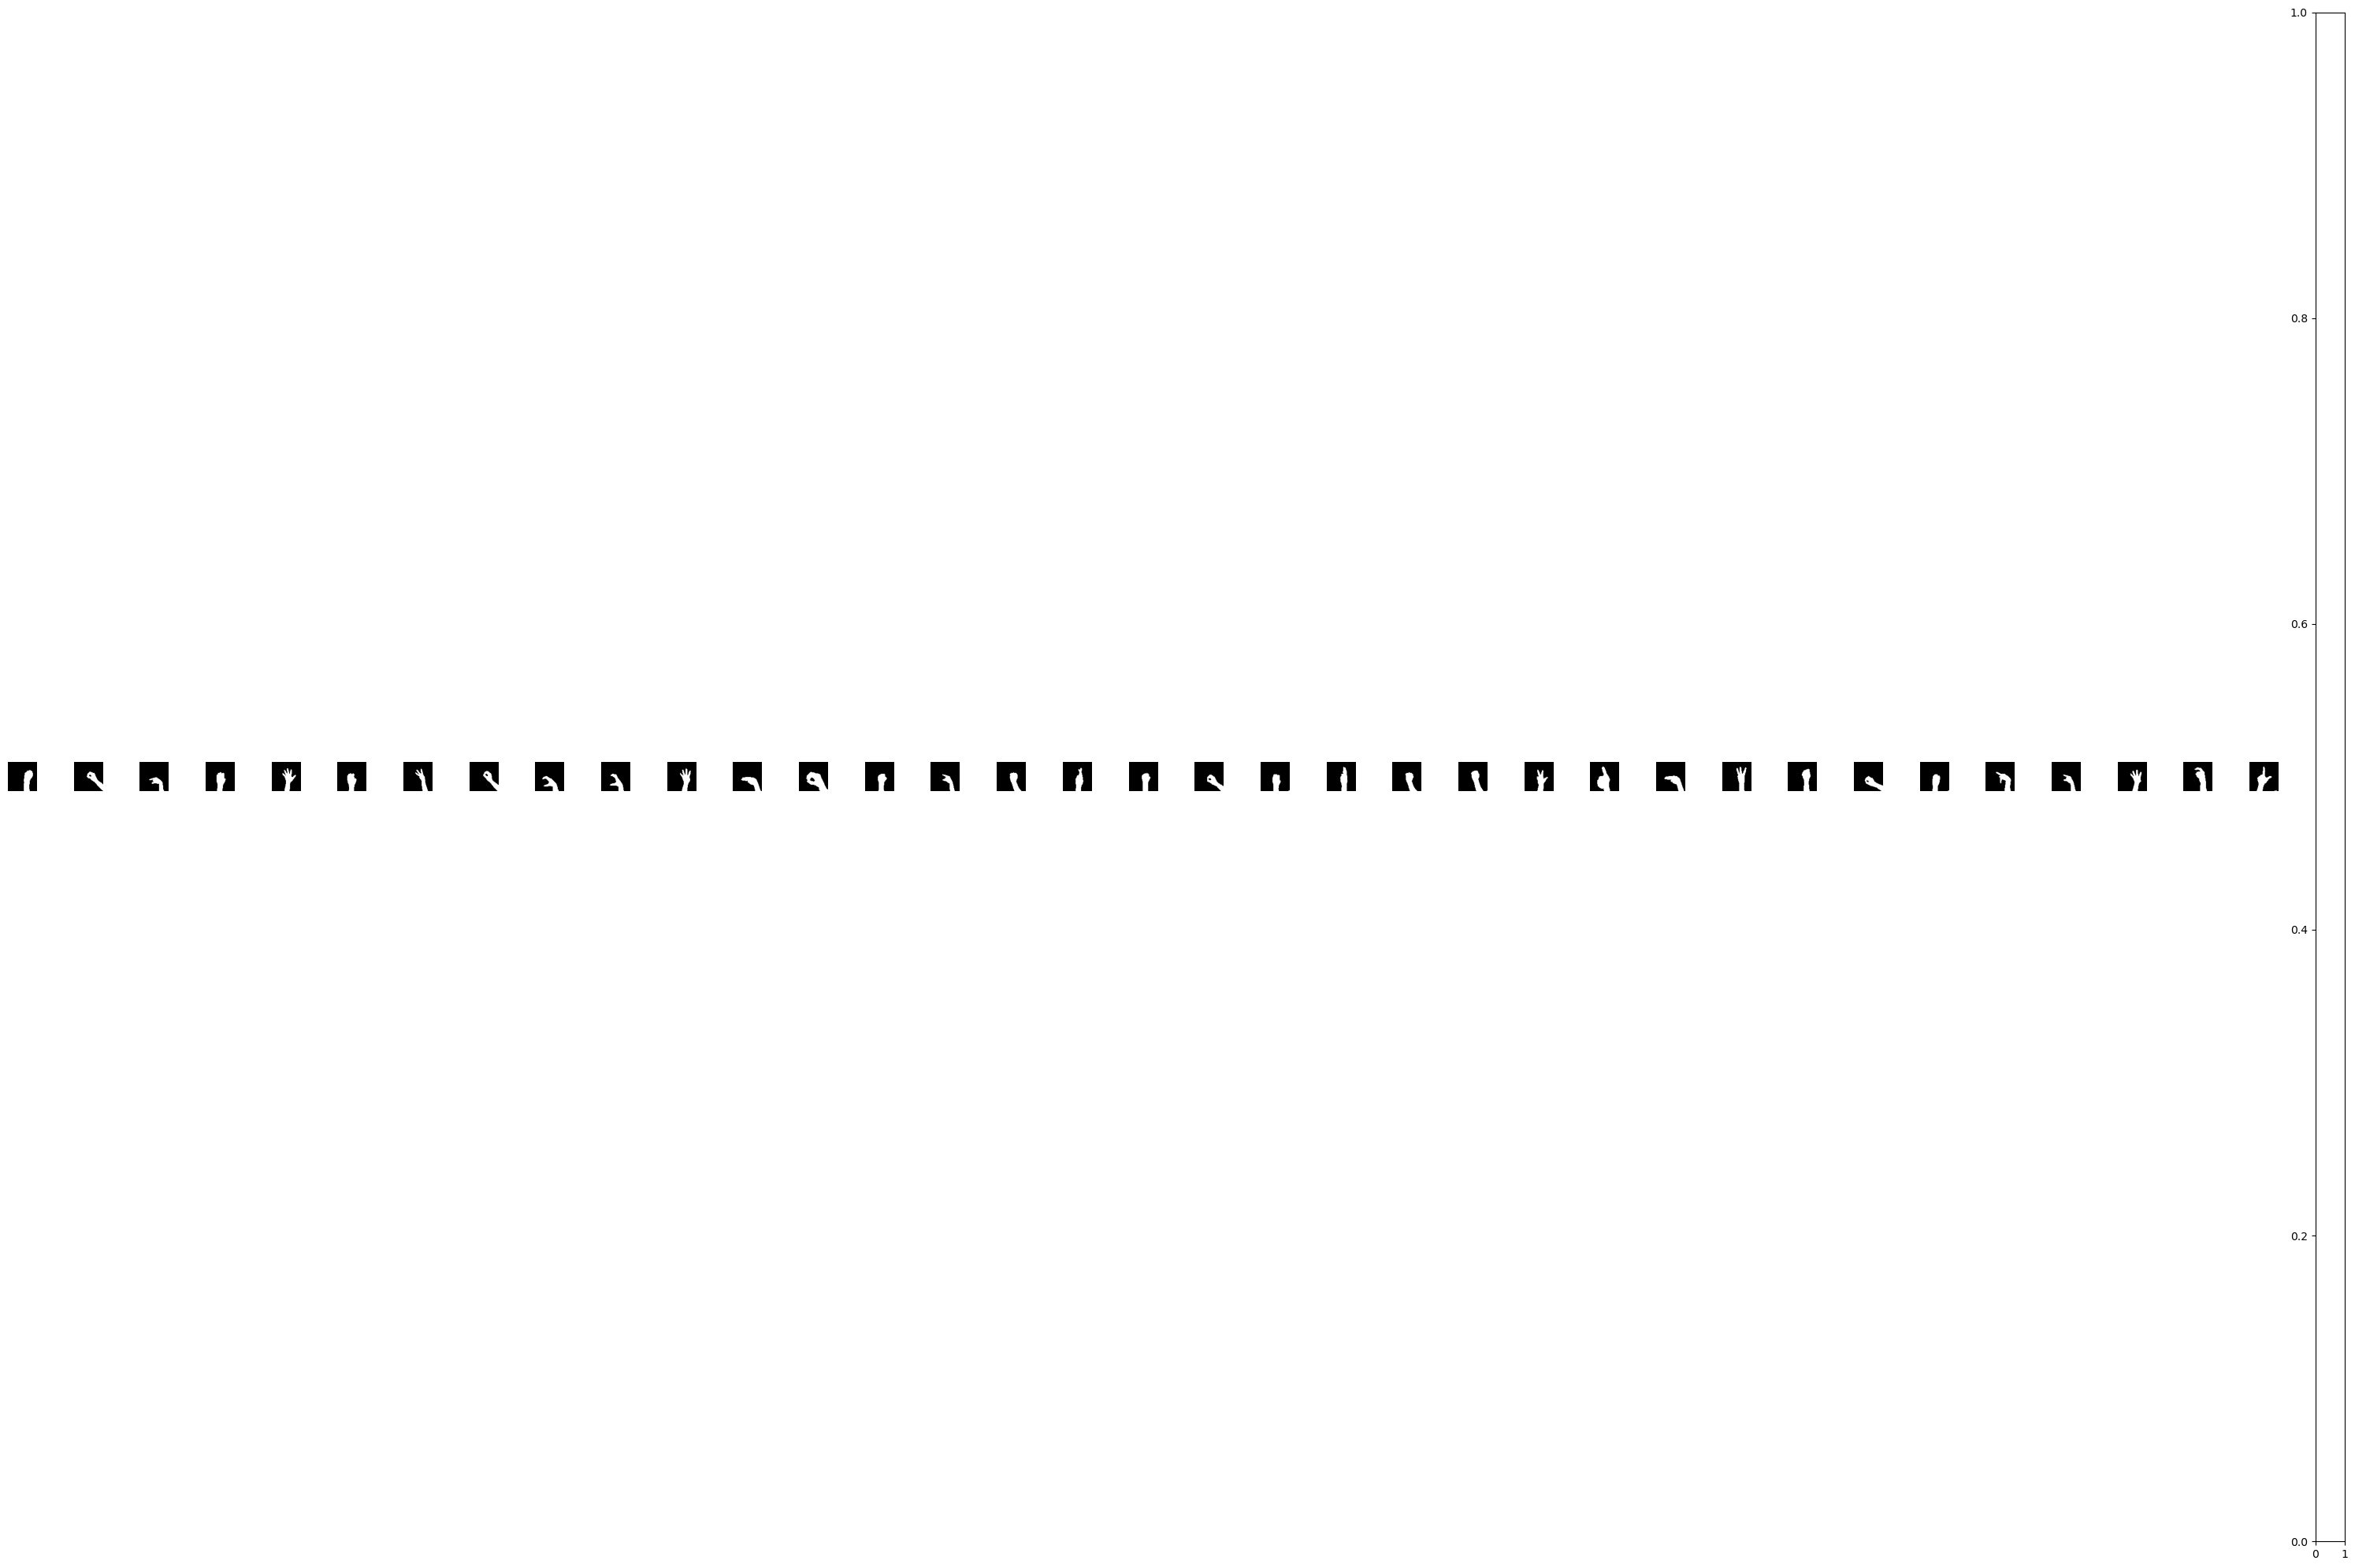

(35, 64, 64, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/15
261/261 [==============================] - 94s 362ms/step - loss: 1.5767 - accuracy: 0.6679 - val_loss: 1.5168 - val_accuracy: 0.7136
Epoch 2/15
261/261 [==============================] - 103s 394ms/step - loss: 0.0639 - accuracy: 0.9826 - val_loss: 2.4143 - val_accuracy: 0.8007
Epoch 3/15
261/261 [==============================] - 83s 319ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 1.3391 - val_accuracy: 0.8376
Epoch 4/15
261/261 [==============================] - 123s 469ms/step - loss: 2.0531e-04 - accuracy: 1.0000 - val_loss: 2.6865 - val_accuracy: 0.8404
Epoch 5/15
261/261 [==============================] - 113s 432ms/step - loss: 1.2138e-04 - accuracy: 1.0000 - val_loss: 1.3327 - val_accuracy: 0.8404
Epoch 6/15
261/261 [==============================] - 203s 780ms/step - loss: 8.5260e-05 - a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

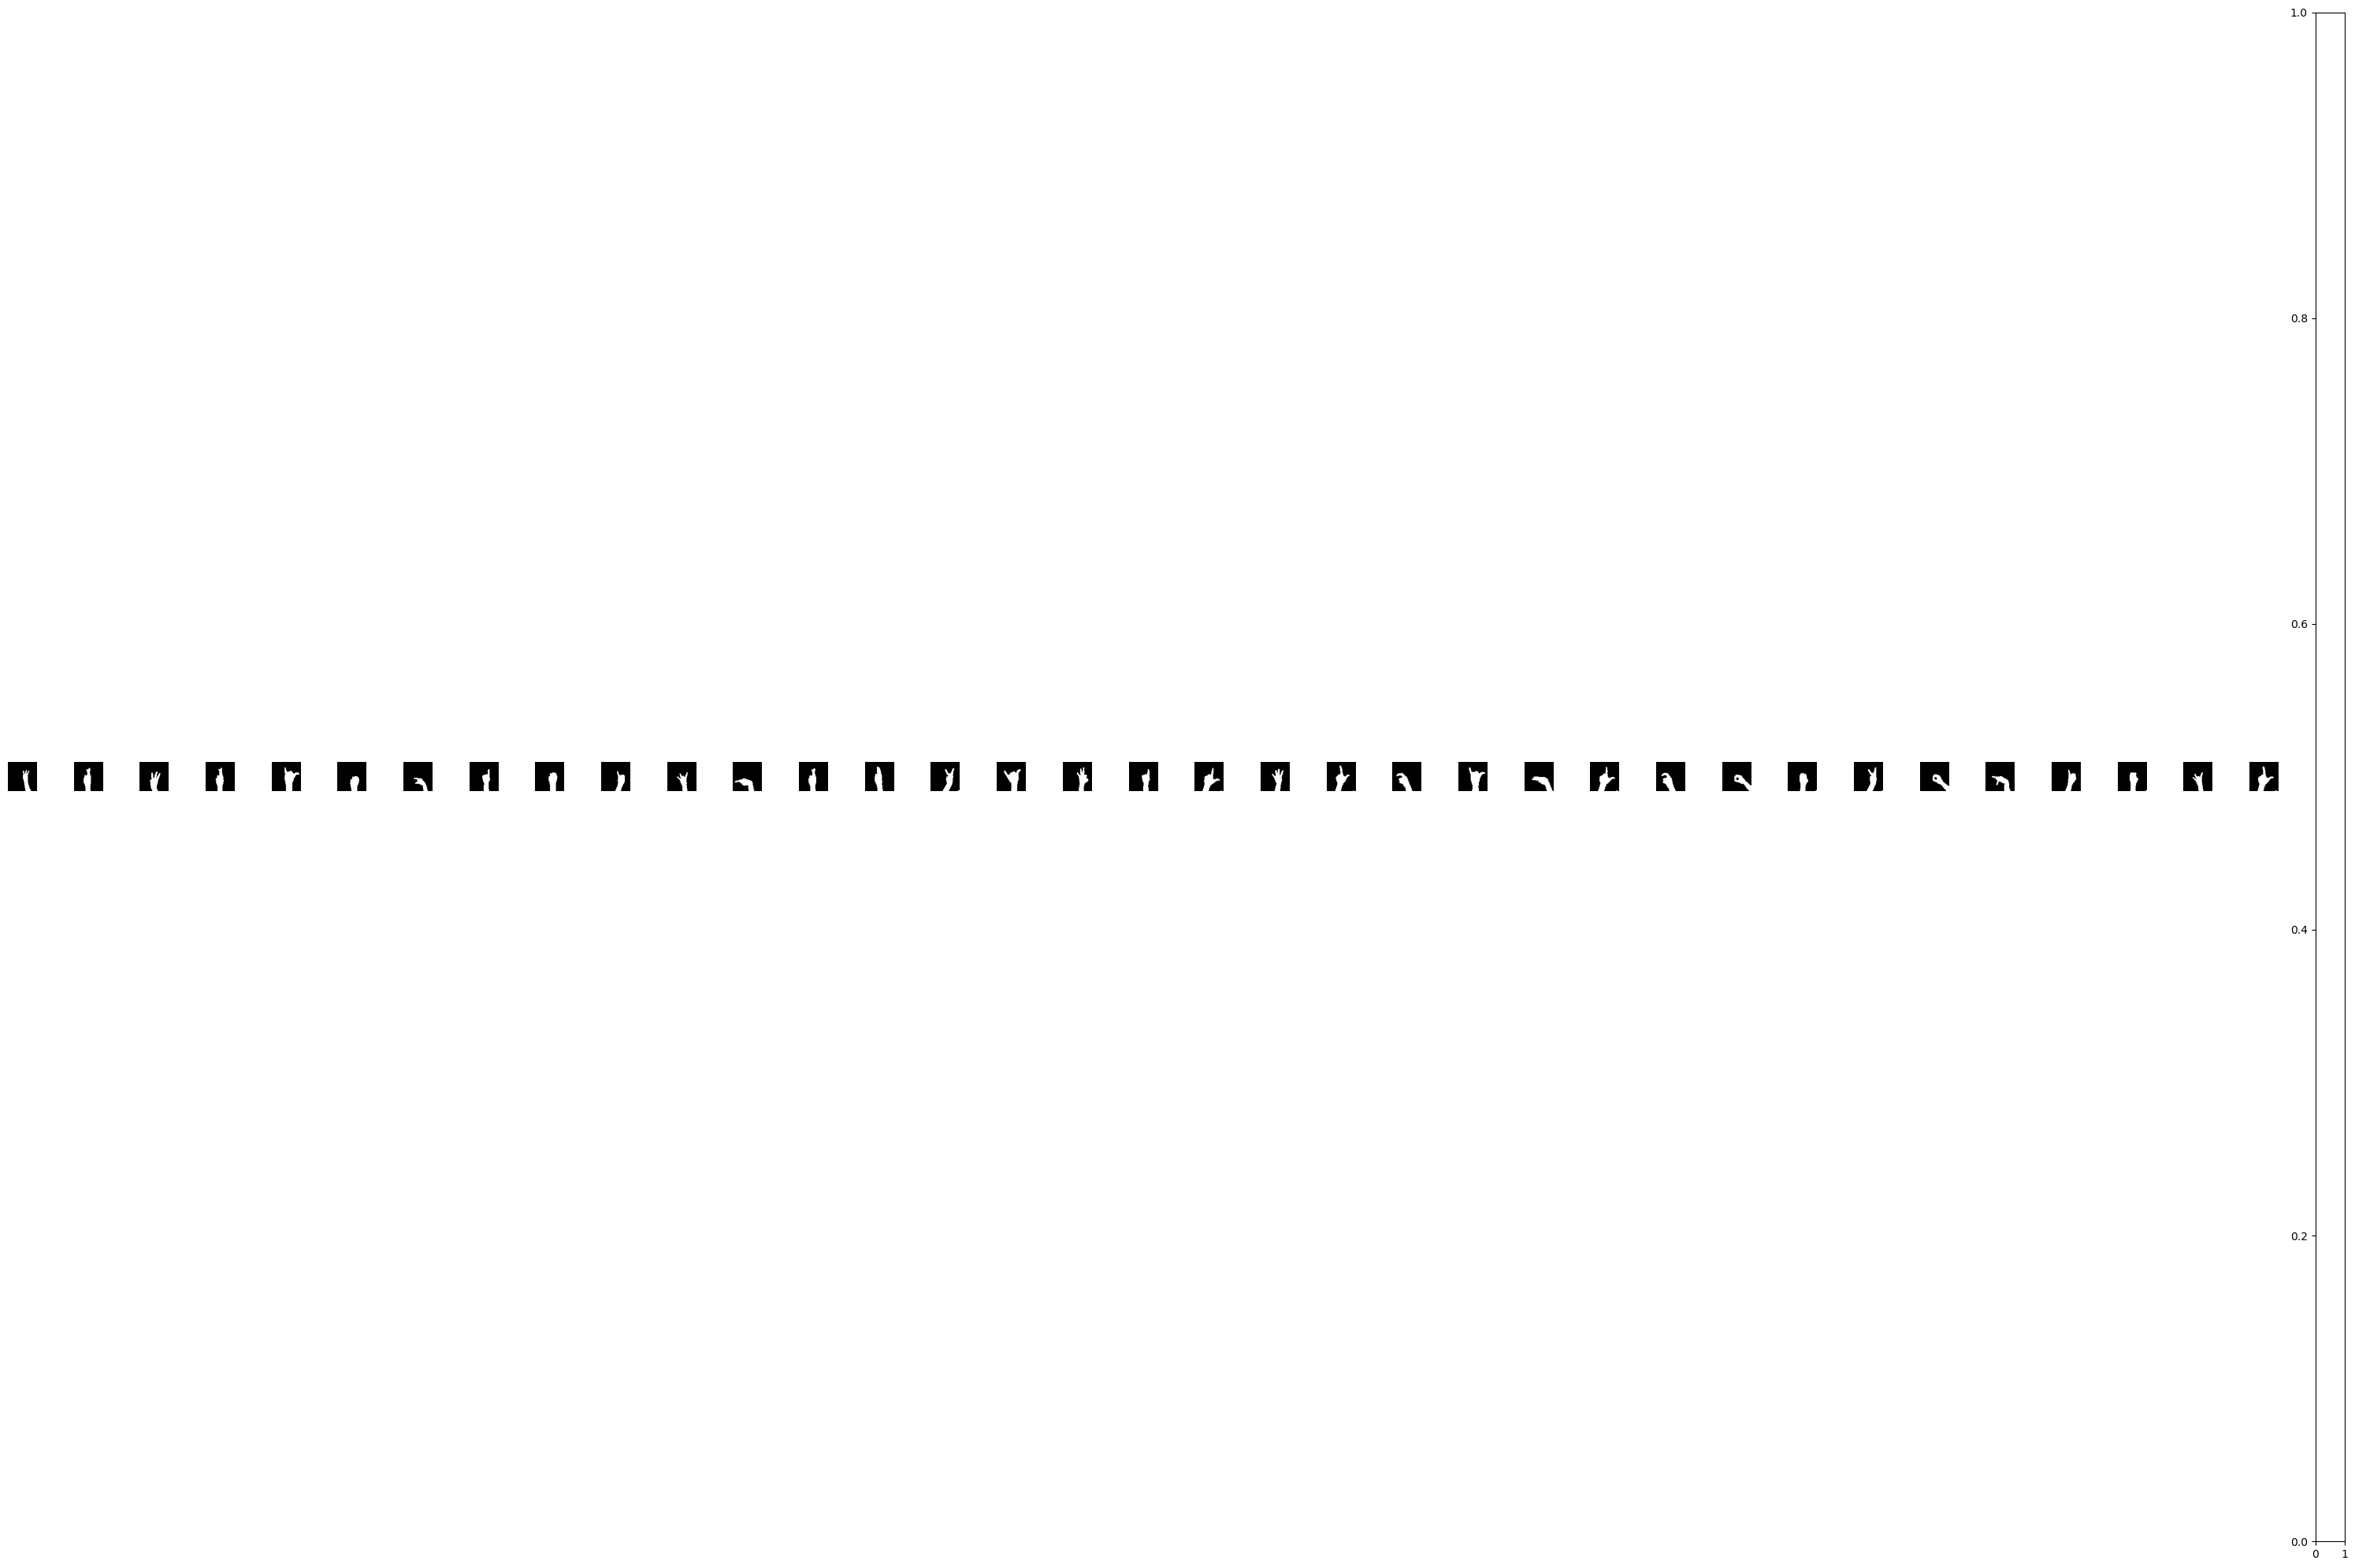

Actual labels
7
   
R
   
W
   
R
   
Y
   
N
   
Q
   
1
   
N
   
I
   
9
   
G
   
R
   
U
   
K
   
Y
   
10
   
1
   
L
   
5
   
L
   
X
   
Y
   
H
   
L
   
X
   
O
   
D
   
K
   
O
   
P
   
I
   
D
   
9
   
L
   
(35, 64, 64, 3)


{'val_loss': [1.516756534576416,
  2.4143316745758057,
  1.3390741348266602,
  2.6864676475524902,
  1.3327034711837769,
  1.6967097520828247,
  3.2043731212615967,
  2.255685567855835,
  1.1247707605361938,
  1.2152155637741089,
  1.6627141237258911,
  1.345473289489746,
  2.0566751956939697,
  2.42120099067688,
  3.073421001434326],
 'val_accuracy': [0.7135888338088989,
  0.800696849822998,
  0.8376306891441345,
  0.8404181003570557,
  0.8404181003570557,
  0.8397212624549866,
  0.8404181003570557,
  0.8397212624549866,
  0.8404181003570557,
  0.8404181003570557,
  0.8411149978637695,
  0.8418118357658386,
  0.8418118357658386,
  0.8404181003570557,
  0.8418118357658386],
 'loss': [1.5825365833615674,
  0.06417358124546235,
  0.0067352248856491605,
  0.00020508291863197841,
  0.00012173678231385824,
  8.555863856410425e-05,
  6.322706836623335e-05,
  4.9215199219430695e-05,
  3.899522172335454e-05,
  3.124266563544073e-05,
  2.5500986927673927e-05,
  2.092401496114679e-05,
  1.746612

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, save_model
import itertools
import random
import warnings
import numpy as np
import cv2

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r"C:\Users\mouni\OneDrive\Desktop\promise\project\data sacience projec t 1\gesture1\train2"
test_path = r"C:\Users\mouni\OneDrive\Desktop\promise\project\data sacience projec t 1\gesture1\test2"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=35,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=35, shuffle=True)

imgs, labels = next(train_batches)



#Plotting the images...
def plotImages(imgs):
    fig, axes = plt.subplots(1, 36, figsize=(30,20))
    axes = axes.flatten()
    
    for img, ax in zip( imgs , axes ):
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(35,activation ="softmax"))





model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')



model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=15, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


#model.save('best_model_dataflair.h5')
model.save('best_model_dataflair3.h5')

print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'A',12:'B',13:'C',14:'D',15:'E',16:'F',17:'G',18:'H',19:'I',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    
    print(word_dict[np.argmax(i)], end='   ')
    

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)])
    print("   ")

print(imgs.shape)
model.save("best_model_dataflair3.h5")
history2.history


Found 10536 images belonging to 35 classes.
Found 1435 images belonging to 35 classes.


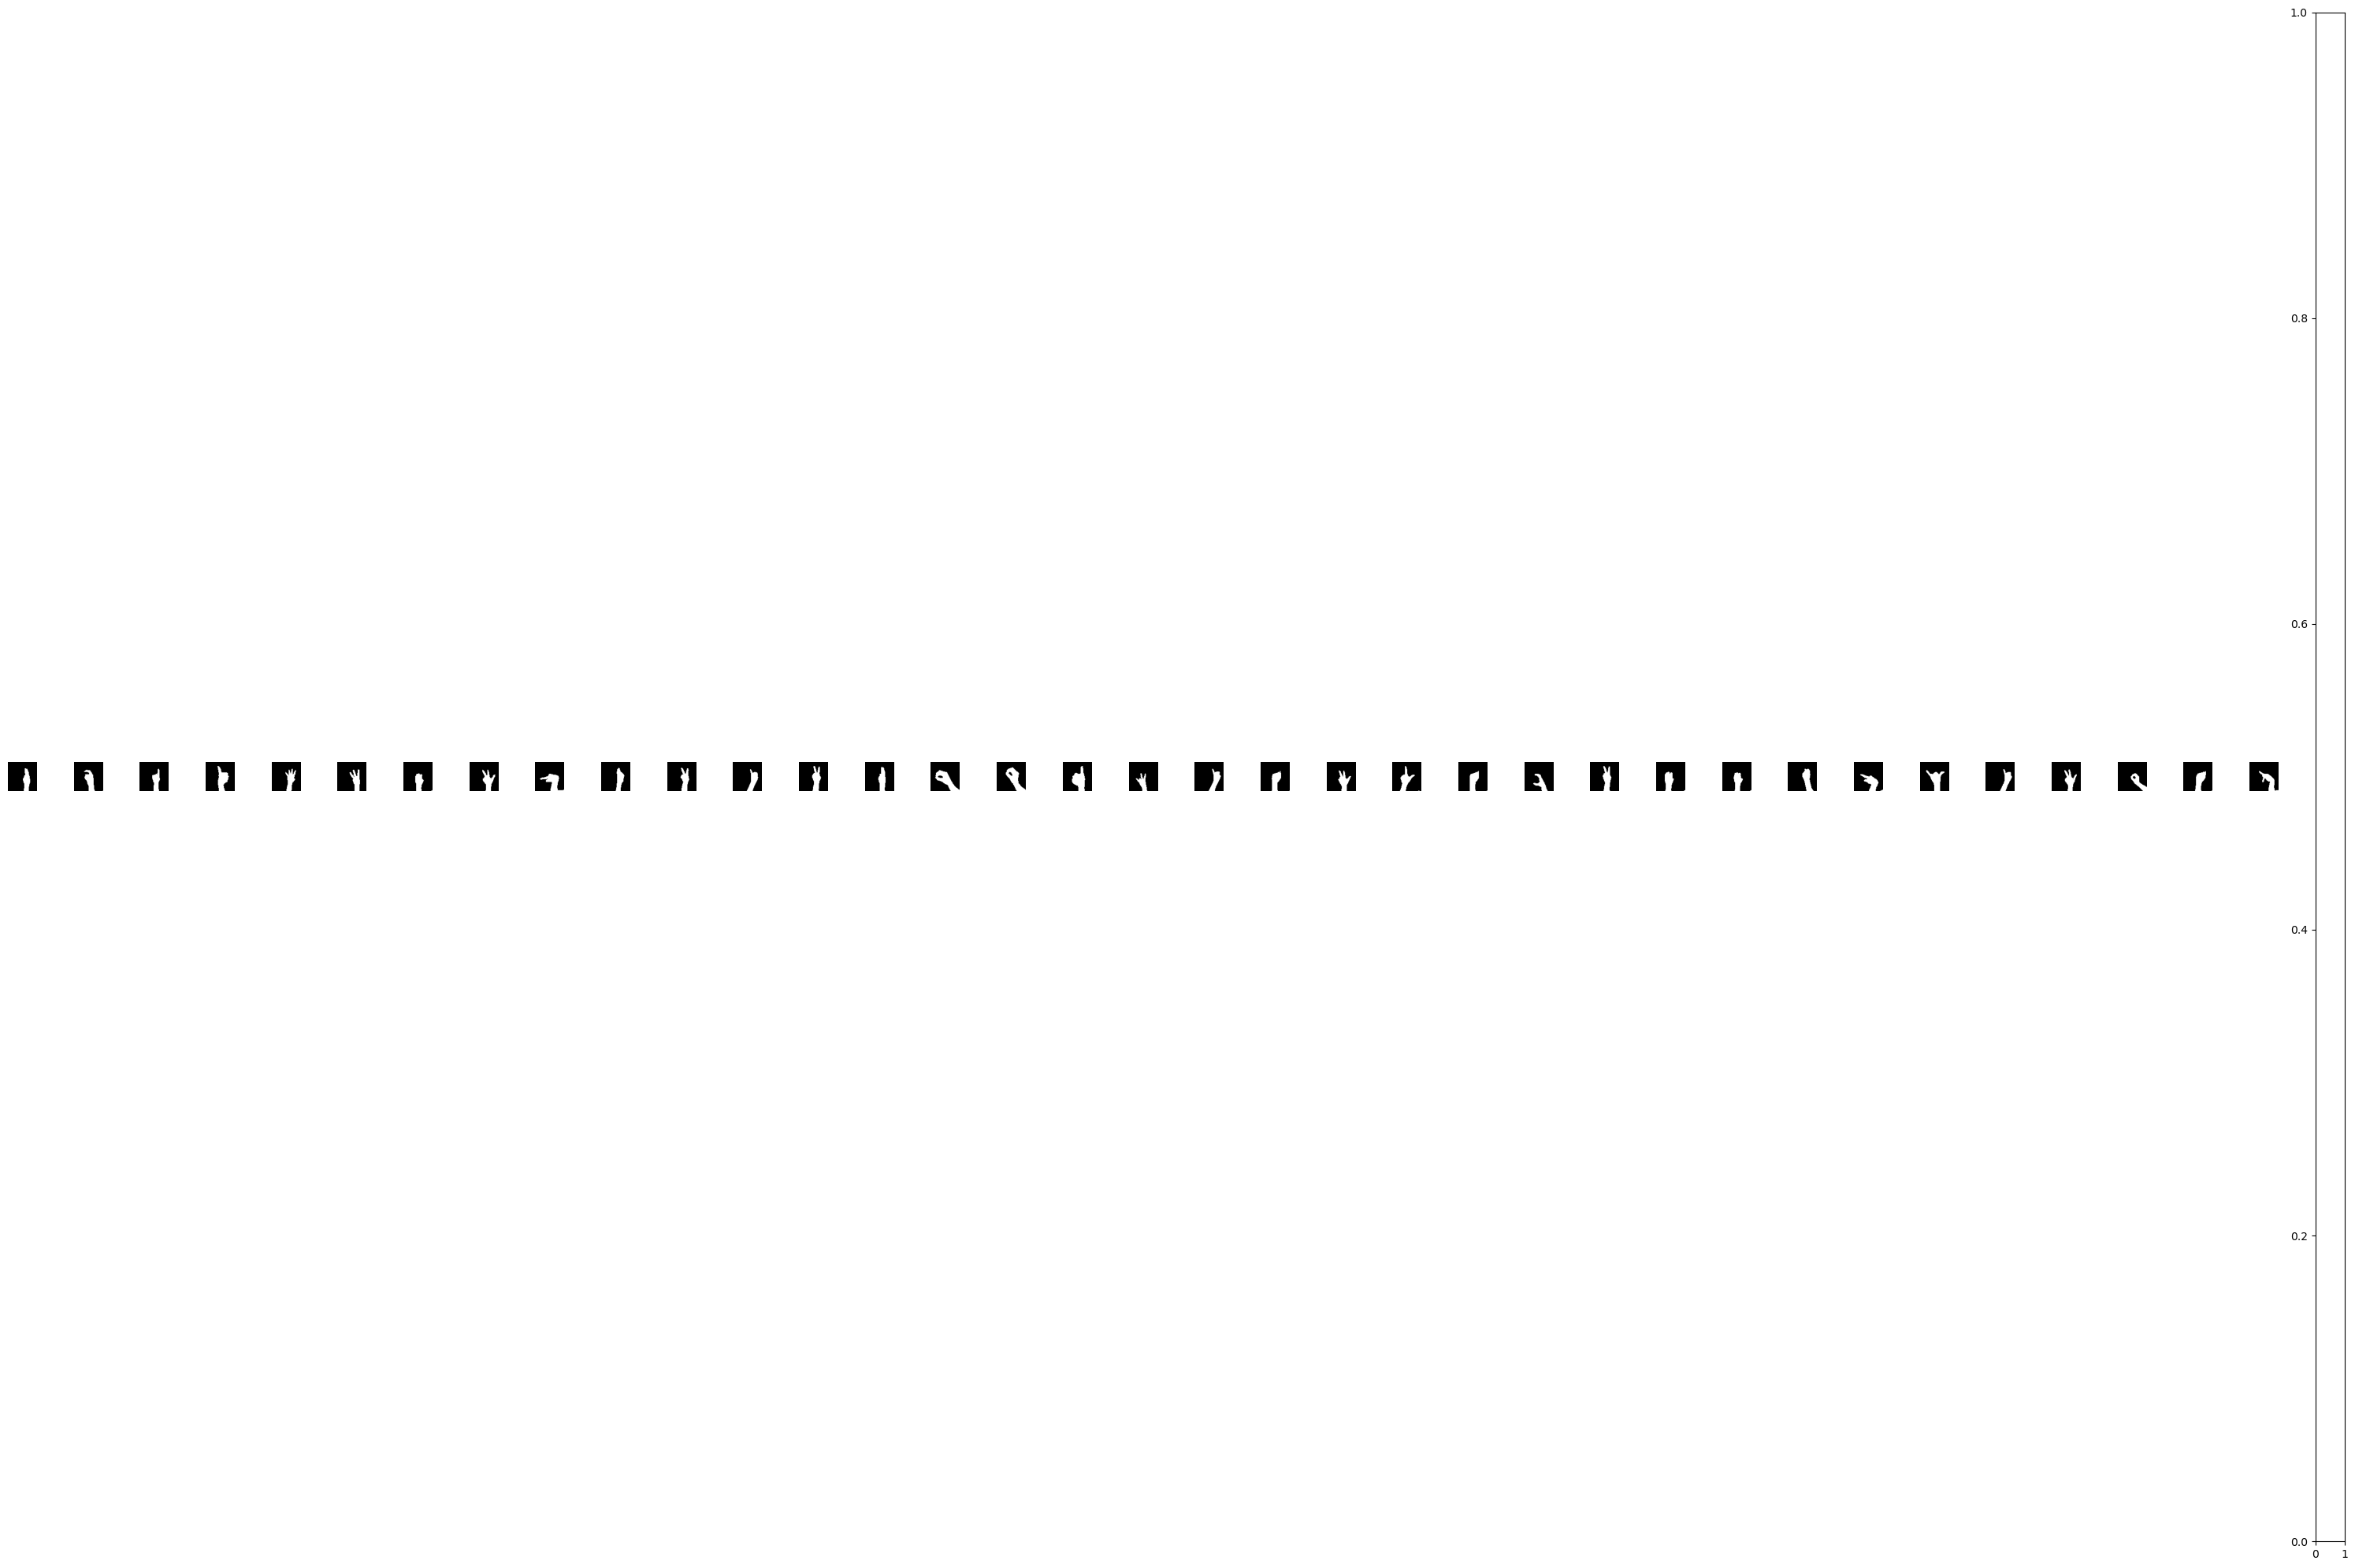

(35, 64, 64, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/15
302/302 [==============================] - 101s 334ms/step - loss: 1.1923 - accuracy: 0.7660 - val_loss: 0.3408 - val_accuracy: 0.9693
Epoch 2/15
302/302 [==============================] - 109s 362ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0069 - val_accuracy: 0.9937
Epoch 3/15
302/302 [==============================] - 118s 392ms/step - loss: 0.0523 - accuracy: 0.9850 - val_loss: 0.0019 - val_accuracy: 0.9937
Epoch 4/15
302/302 [==============================] - 108s 357ms/step - loss: 0.0182 - accuracy: 0.9955 - val_loss: 0.5371 - val_accuracy: 0.9143
Epoch 5/15
302/302 [==============================] - 124s 410ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 9.2903e-05 - val_accuracy: 1.0000
Epoch 6/15
302/302 [==============================] - 122s 404ms/step - loss: 6.2223e-05 - acc

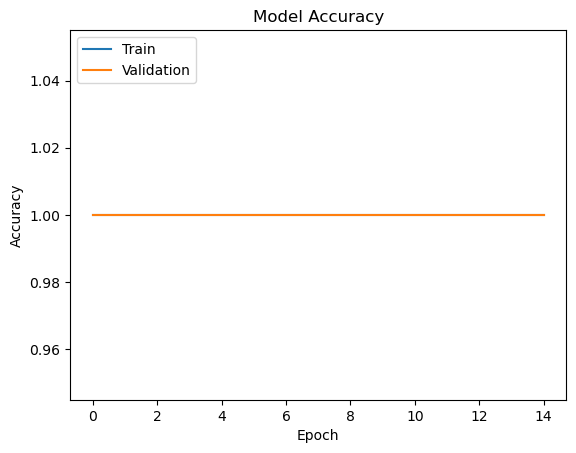

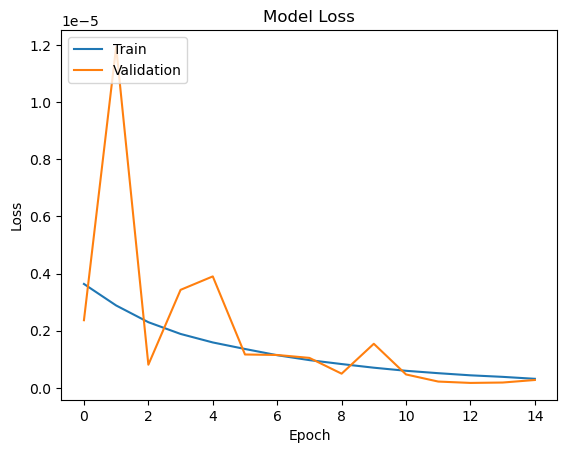

{'val_loss': [0.3408109247684479, 0.006906137801706791, 0.001917875255458057, 0.5371192097663879, 9.290337766287848e-05, 5.434746708488092e-05, 4.64941949758213e-05, 1.158298346126685e-05, 1.8495113181415945e-05, 7.757220009807497e-05, 1.4807689694862347e-05, 4.696702035289491e-06, 1.8602138879941776e-05, 4.611570602719439e-06, 1.0422264722365071e-06], 'val_accuracy': [0.9693379998207092, 0.9937282204627991, 0.9937282204627991, 0.9142857193946838, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.1961228141167397, 0.04072584775454486, 0.052448177035127413, 0.01827063525325656, 0.007173448054968144, 6.242296531261299e-05, 3.7791433237282845e-05, 2.5160540778670795e-05, 1.8169014186160437e-05, 1.3870876240226905e-05, 1.0857574853113046e-05, 8.664551169922911e-06, 6.889024971530422e-06, 5.510531566996502e-06, 4.505629326108566e-06], 'accuracy': [0.76604027, 0.98737663, 0.98500377, 0.9955391, 0.9983865, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'lr': [0.001, 0.001

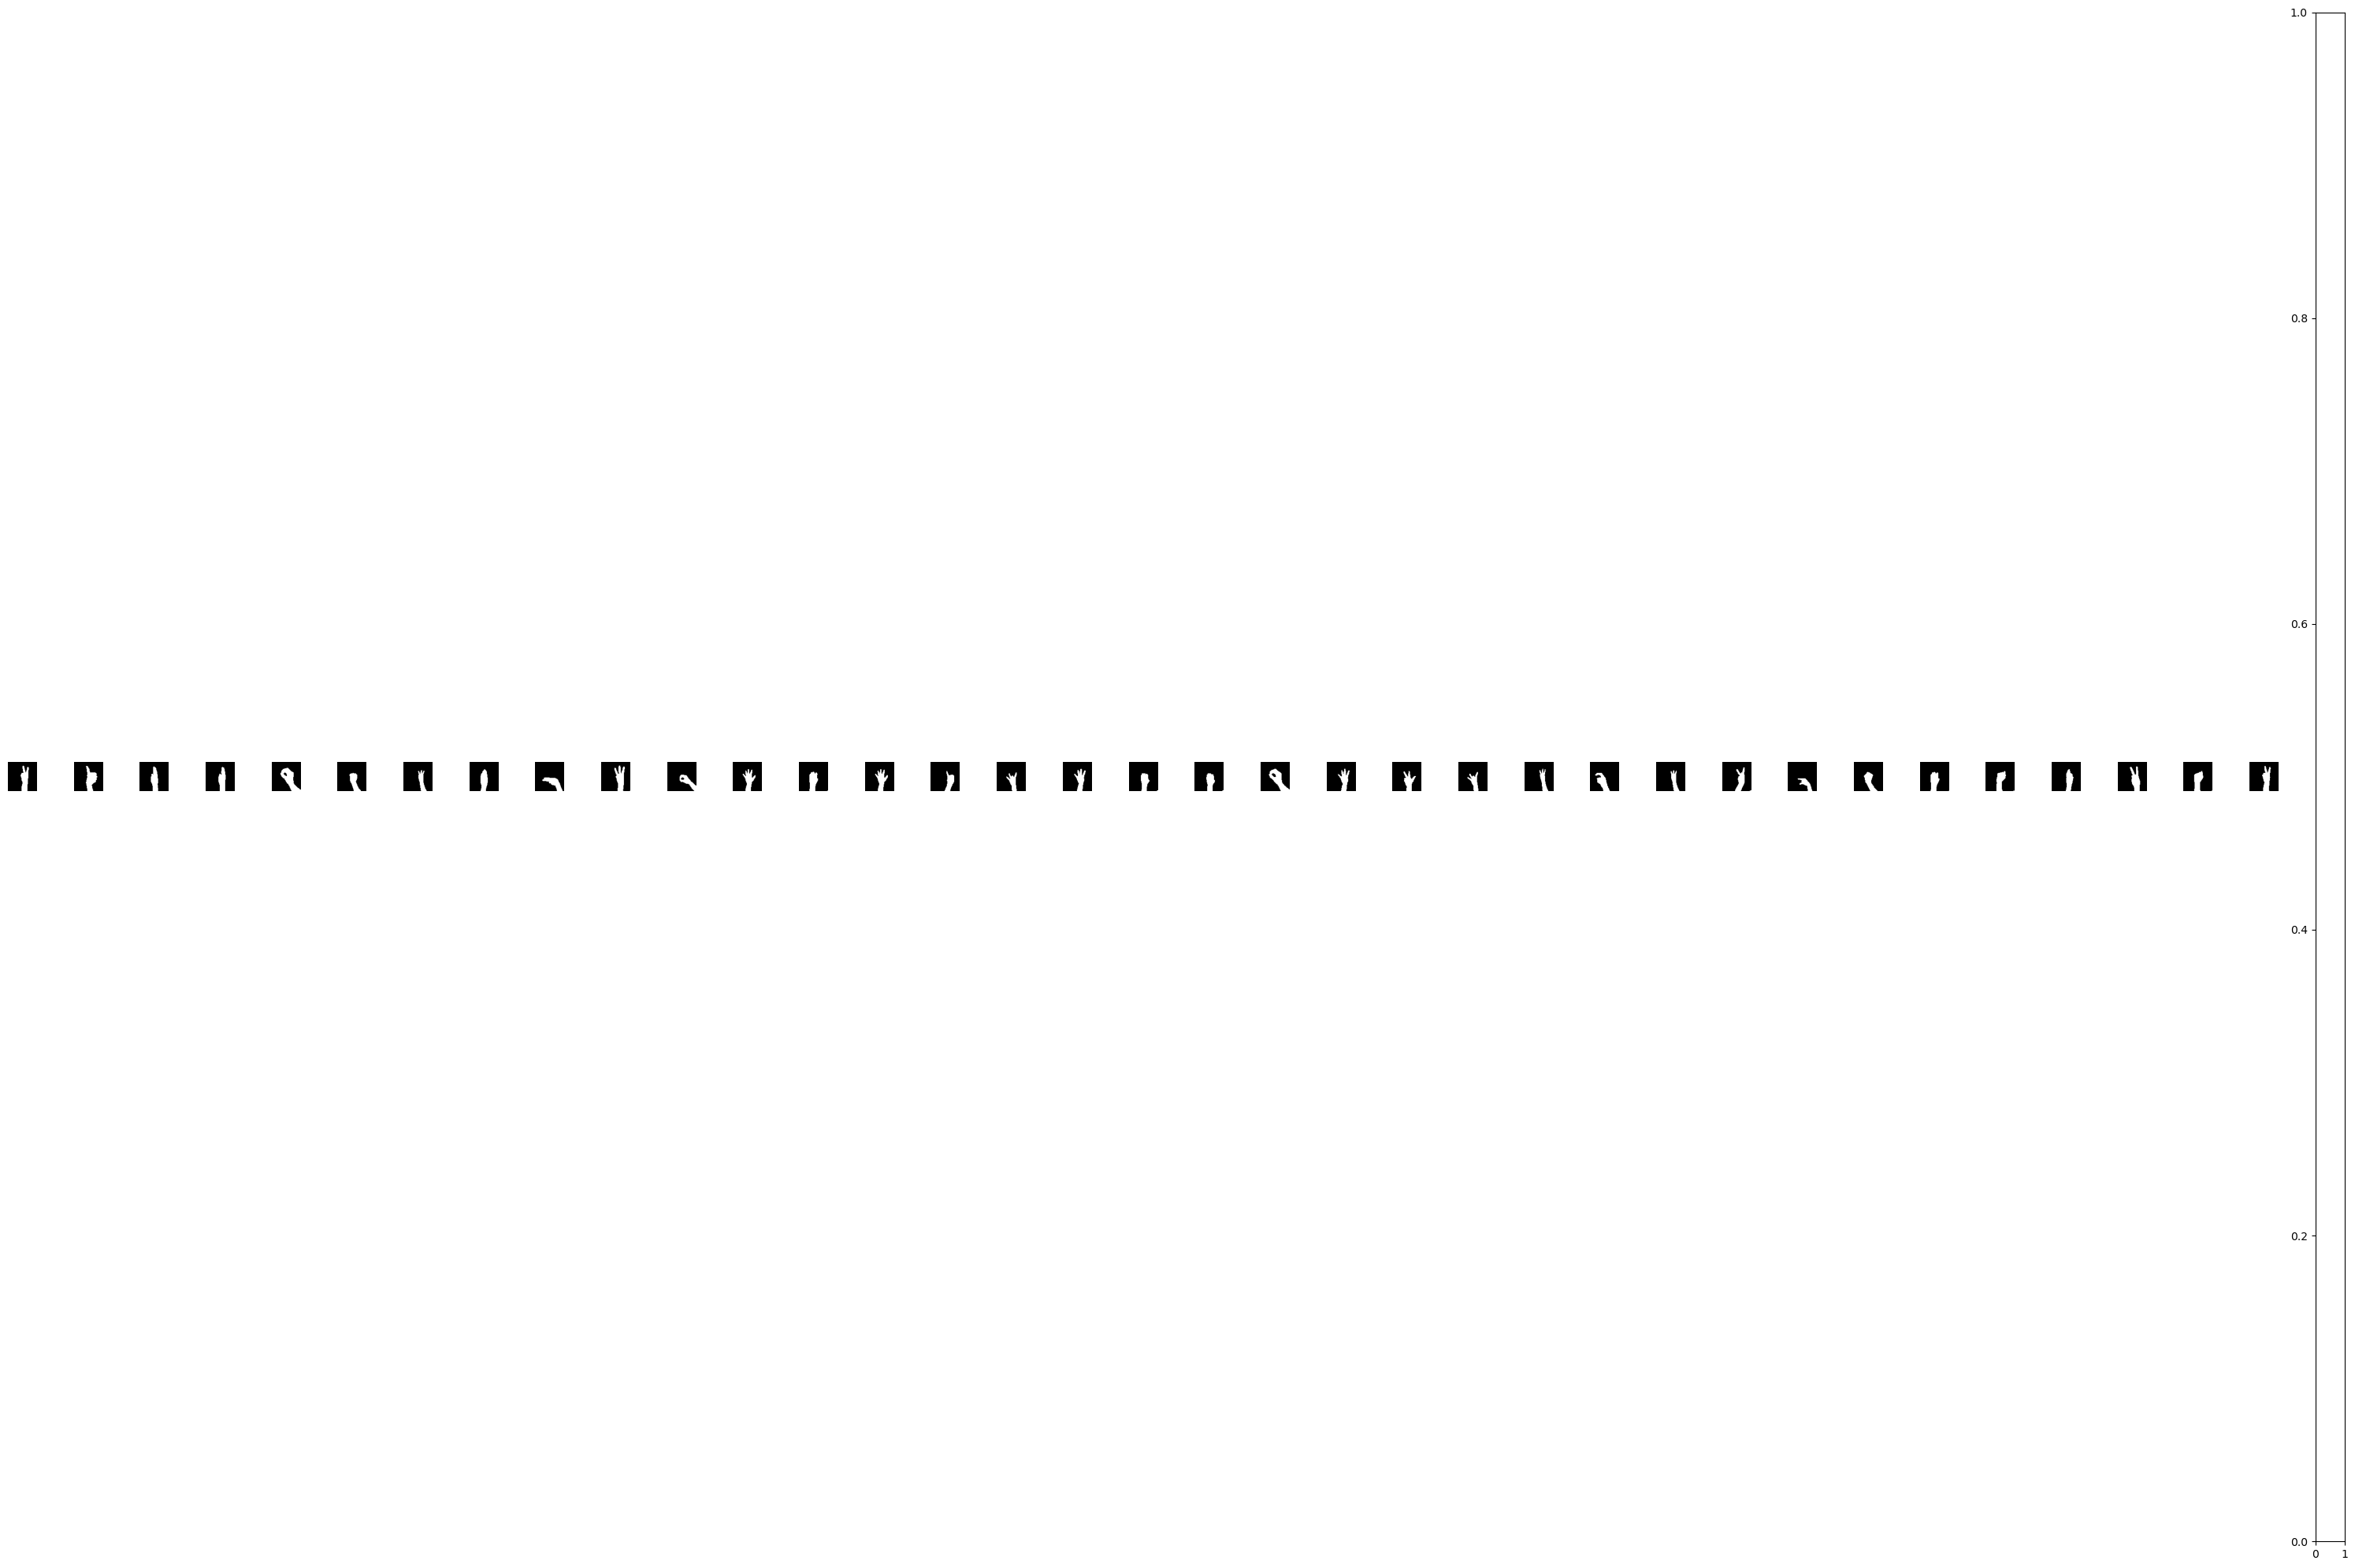

Actual labels
3
   
2
   
U
   
U
   
0
   
M
   
7
   
B
   
H
   
W
   
O
   
6
   
E
   
6
   
I
   
9
   
5
   
D
   
D
   
0
   
5
   
4
   
9
   
7
   
X
   
7
   
K
   
Q
   
T
   
E
   
A
   
F
   
V
   
A
   
3
   
(35, 64, 64, 3)


{'val_loss': [0.3408109247684479,
  0.006906137801706791,
  0.001917875255458057,
  0.5371192097663879,
  9.290337766287848e-05,
  5.434746708488092e-05,
  4.64941949758213e-05,
  1.158298346126685e-05,
  1.8495113181415945e-05,
  7.757220009807497e-05,
  1.4807689694862347e-05,
  4.696702035289491e-06,
  1.8602138879941776e-05,
  4.611570602719439e-06,
  1.0422264722365071e-06],
 'val_accuracy': [0.9693379998207092,
  0.9937282204627991,
  0.9937282204627991,
  0.9142857193946838,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.1961228141167397,
  0.04072584775454486,
  0.052448177035127413,
  0.01827063525325656,
  0.007173448054968144,
  6.242296531261299e-05,
  3.7791433237282845e-05,
  2.5160540778670795e-05,
  1.8169014186160437e-05,
  1.3870876240226905e-05,
  1.0857574853113046e-05,
  8.664551169922911e-06,
  6.889024971530422e-06,
  5.510531566996502e-06,
  4.505629326108566e-06],
 'accuracy': [0.76604027,
  0.98737663,
  0.98500377,
 

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, save_model
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r"C:\Users\mouni\OneDrive\Desktop\gesture\train1"
test_path = r"C:\Users\mouni\OneDrive\Desktop\gesture\test1"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=35,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=35, shuffle=True)

imgs, labels = next(train_batches)



#Plotting the images...
def plotImages(imgs):
    fig, axes = plt.subplots(1, 36, figsize=(30,20))
    axes = axes.flatten()
    
    for img, ax in zip( imgs , axes ):
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(35,activation ="softmax"))





model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')



model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=15, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
history = model.fit(train_batches, epochs=15, callbacks=[reduce_lr, early_stop], validation_data=test_batches)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#model.save('best_model_dataflair.h5')
model.save('best_model_dataflair3.h5')

print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'A',12:'B',13:'C',14:'D',15:'E',16:'F',17:'G',18:'H',19:'I',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    
    print(word_dict[np.argmax(i)], end='   ')
    

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)])
    print("   ")

print(imgs.shape)
model.save("best_model_dataflair3.h5")
history2.history
